In [1]:
# Initial Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly_express as px

In [3]:
# Importing dataset

In [4]:
df = pd.read_csv('Condensed Dataset.csv')

In [5]:
sns.set_style('darkgrid')
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

In [6]:
# Revised Linear Support Vector Regression Model (After Feature Selection) to predict NBA_ppg from NCAA stats

In [7]:
"""
From previous jupyter notebook, the features with significant feature importance values from the Linear SVR Model are:
- NCAA_fgpg
- NCAA_ftpg
- position
- NCAA__3ptpct
- NCAA__3ptapg
- NCAA_fgpct
- NCAA__3ptpg
- NCAA_ppg
- NCAA_fgapg
- NCAA_ftapg
- NCAA_ft

Thus, I will perform feature selection and will only use these features in the regression models to try and improve these models
"""

'\nFrom previous jupyter notebook, the features with significant feature importance values from the Linear SVR Model are:\n- NCAA_fgpg\n- NCAA_ftpg\n- position\n- NCAA__3ptpct\n- NCAA__3ptapg\n- NCAA_fgpct\n- NCAA__3ptpg\n- NCAA_ppg\n- NCAA_fgapg\n- NCAA_ftapg\n- NCAA_ft\n\nThus, I will perform feature selection and will only use these features in the regression models to try and improve these models\n'

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
feature_columns = ['NCAA_fgpg', 'NCAA_ftpg', 'position', 'NCAA__3ptpct', 'NCAA__3ptapg', 'NCAA_fgpct', 'NCAA__3ptpg', 
                  'NCAA_ppg', 'NCAA_fgapg', 'NCAA_ftapg', 'NCAA_ft']
target_col = 'NBA_ppg'
df_model = df[feature_columns]
df_model_dummy = pd.get_dummies(df_model, drop_first=True)
X = df_model_dummy
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [11]:
print(df_model_dummy.iloc[0])

NCAA_fgpg       3.300
NCAA_ftpg       1.800
NCAA__3ptpct    0.000
NCAA__3ptapg    0.000
NCAA_fgpct      0.599
NCAA__3ptpg     0.000
NCAA_ppg        8.500
NCAA_fgapg      5.600
NCAA_ftapg      2.500
NCAA_ft         0.728
position_C-F    0.000
position_F      0.000
position_F-C    1.000
position_F-G    0.000
position_G      0.000
position_G-F    0.000
Name: 0, dtype: float64


In [12]:
print(df[target_col][0])

5.7


In [13]:
df_model_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2030 entries, 0 to 2029
Data columns (total 16 columns):
NCAA_fgpg       2030 non-null float64
NCAA_ftpg       2030 non-null float64
NCAA__3ptpct    2030 non-null float64
NCAA__3ptapg    2030 non-null float64
NCAA_fgpct      2030 non-null float64
NCAA__3ptpg     2030 non-null float64
NCAA_ppg        2030 non-null float64
NCAA_fgapg      2030 non-null float64
NCAA_ftapg      2030 non-null float64
NCAA_ft         2030 non-null float64
position_C-F    2030 non-null uint8
position_F      2030 non-null uint8
position_F-C    2030 non-null uint8
position_F-G    2030 non-null uint8
position_G      2030 non-null uint8
position_G-F    2030 non-null uint8
dtypes: float64(10), uint8(6)
memory usage: 170.6 KB


Linear Support Vector Regressor Mean Absolute Error: 3.124966780305998

Linear Support Vector Regressor Median Absolute Error: 2.2921536133116684

Linear Support Vector Regressor Mean Squared Error: 18.512115755902585

Linear Support Vector Regressor Score: 1.0



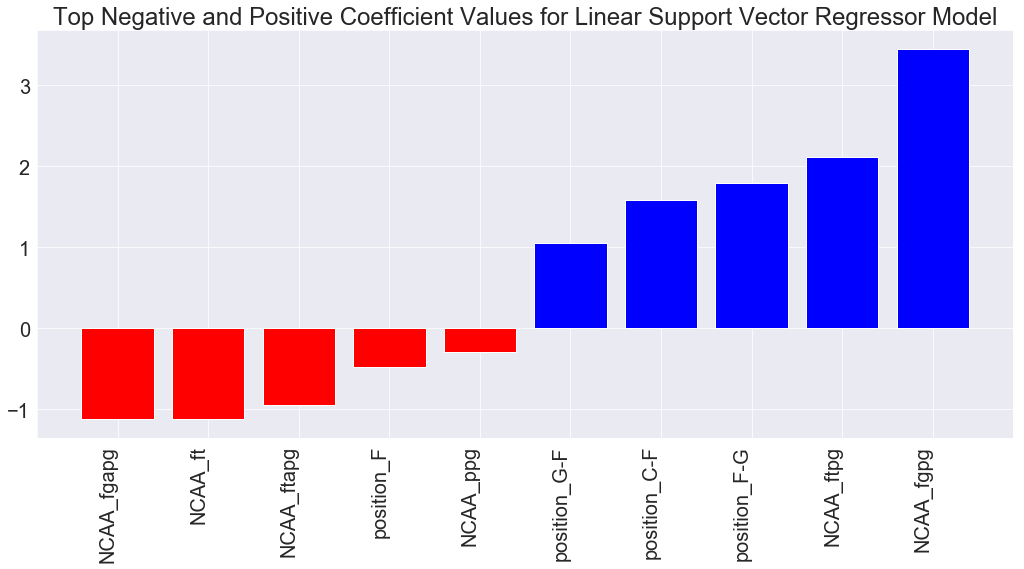

In [14]:
def supportVectorRegressorLinearFunction(train_X, test_X, train_y, test_y):
    regressor = SVR(kernel='linear')
    regressor.fit(train_X, train_y)
    predictions = regressor.predict(test_X)
    print('Linear Support Vector Regressor Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions))
    print()
    print('Linear Support Vector Regressor Median Absolute Error:', metrics.median_absolute_error(test_y, predictions))
    print()
    print('Linear Support Vector Regressor Mean Squared Error:', metrics.mean_squared_error(test_y, predictions))
    print()
    print('Linear Support Vector Regressor Score:', regressor.score(test_X, predictions))
    print()
    return regressor

def createVisualizationCoefficients(coefficients_array, column_names):
    top_positive_coefficients = np.argsort(coefficients_array)[-5:]
    top_negative_coefficients = np.argsort(coefficients_array)[:5]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(17.5, 7.5))
    colors = ['red' if c < 0 else 'blue' for c in coefficients_array[top_coefficients]]
    plt.bar(np.arange(2 * 5), coefficients_array[top_coefficients], color=colors)
    feature_names = np.array(column_names)
    plt.xticks(np.arange(0, 2 * 5), feature_names[top_coefficients], rotation=90, ha='right')
    plt.xlabel('', fontsize = 5)
    plt.title("Top Negative and Positive Coefficient Values for Linear Support Vector Regressor Model")
    plt.savefig('Plots/Top Negative and Positive Coefficient Values for Linear Support Vector Regressor Model After Feature Selection.jpg')
    plt.show()
    return None

sv_regressor_linear = supportVectorRegressorLinearFunction(X_train, X_test, y_train, y_test)
createVisualizationCoefficients(sv_regressor_linear.coef_.ravel(), list(df_model_dummy.columns))

In [15]:
# Predicting NBA PPG for some top draft picks of the 2019 NBA Draft (although their rookie seasons are already almost completed at this time)

In [16]:
"""
Some of the top picks of the 2019 NBA Draft who played NCAA College Basketball:
- Zion Williamson
- Ja Morant
- RJ Barrett
"""

'\nSome of the top picks of the 2019 NBA Draft who played NCAA College Basketball:\n- Zion Williamson\n- Ja Morant\n- RJ Barrett\n'

In [17]:
"""
Index values and the attributes they correspond to:
0: NCAA_fgpg
1: NCAA_ftpg
2: position
3: NCAA__3ptpct
4: NCAA__3ptapg
5: NCAA_fgpct
6: NCAA__3ptpg
7: NCAA_ppg
8: NCAA_fgapg
9: NCAA_ftapg
10: NCAA_ft
"""

'\nIndex values and the attributes they correspond to:\n0: NCAA_fgpg\n1: NCAA_ftpg\n2: position\n3: NCAA__3ptpct\n4: NCAA__3ptapg\n5: NCAA_fgpct\n6: NCAA__3ptpg\n7: NCAA_ppg\n8: NCAA_fgapg\n9: NCAA_ftapg\n10: NCAA_ft\n'

In [18]:
values_for_features_zion_williamson = []
values_for_features_zion_williamson.append(9.0) # NCAA_fgpg
values_for_features_zion_williamson.append(3.9) # NCAA_ftpg
values_for_features_zion_williamson.append('F') # position
values_for_features_zion_williamson.append(0.338) # NCAA__3ptpct
values_for_features_zion_williamson.append(2.2) # NCAA__3ptapg
values_for_features_zion_williamson.append(0.680) # NCAA_fgpct
values_for_features_zion_williamson.append(0.7) # NCAA__3ptpg
values_for_features_zion_williamson.append(22.6) # NCAA_ppg
values_for_features_zion_williamson.append(13.2) # NCAA_fgapg
values_for_features_zion_williamson.append(6.2) # NCAA_ftapg
values_for_features_zion_williamson.append(0.640) # NCAA_ft
zion_williamson_series = pd.Series(values_for_features_zion_williamson, index = df_model.columns)
df_model = df_model.append(zion_williamson_series, ignore_index=True)
df_model_dummy = pd.get_dummies(df_model, drop_first=True)
zion_williamson_NBA_ppg_prediction = sv_regressor_linear.predict(df_model_dummy.iloc[-1].values.reshape(1, -1))[0]
print('Zion Williamson Predicted NBA PPG: ' + str(round(zion_williamson_NBA_ppg_prediction, 2)) + ' PPG')

Zion Williamson Predicted NBA PPG: 13.31 PPG


In [19]:
values_for_features_ja_morant = []
values_for_features_ja_morant.append(6.1) # NCAA_fgpg
values_for_features_ja_morant.append(5.1) # NCAA_ftpg
values_for_features_ja_morant.append('G') # position
values_for_features_ja_morant.append(0.343) # NCAA__3ptpct
values_for_features_ja_morant.append(3.8) # NCAA__3ptapg
values_for_features_ja_morant.append(0.485) # NCAA_fgpct
values_for_features_ja_morant.append(1.3) # NCAA__3ptpg
values_for_features_ja_morant.append(18.7) # NCAA_ppg
values_for_features_ja_morant.append(12.6) # NCAA_fgapg
values_for_features_ja_morant.append(6.3) # NCAA_ftapg
values_for_features_ja_morant.append(0.810) # NCAA_ft
ja_morant_series = pd.Series(values_for_features_ja_morant, index = df_model.columns)
df_model = df_model.append(ja_morant_series, ignore_index=True)
df_model_dummy = pd.get_dummies(df_model, drop_first=True)
ja_morant_NBA_ppg_prediction = sv_regressor_linear.predict(df_model_dummy.iloc[-1].values.reshape(1, -1))[0]
print('Ja Morant Predicted NBA PPG: ' + str(round(ja_morant_NBA_ppg_prediction, 2)) + ' PPG')

Ja Morant Predicted NBA PPG: 8.6 PPG


In [20]:
values_for_features_rj_barrett = []
values_for_features_rj_barrett.append(8.4) # NCAA_fgpg
values_for_features_rj_barrett.append(3.9) # NCAA_ftpg
values_for_features_rj_barrett.append('F') # position
values_for_features_rj_barrett.append(0.308) # NCAA__3ptpct
values_for_features_rj_barrett.append(6.2) # NCAA__3ptapg
values_for_features_rj_barrett.append(0.454) # NCAA_fgpct
values_for_features_rj_barrett.append(1.9) # NCAA__3ptpg
values_for_features_rj_barrett.append(22.6) # NCAA_ppg
values_for_features_rj_barrett.append(18.5) # NCAA_fgapg
values_for_features_rj_barrett.append(5.9) # NCAA_ftapg
values_for_features_rj_barrett.append(0.665) # NCAA_ft
rj_barrett_series = pd.Series(values_for_features_rj_barrett, index = df_model.columns)
df_model = df_model.append(rj_barrett_series, ignore_index=True)
df_model_dummy = pd.get_dummies(df_model, drop_first=True)
rj_barrett_NBA_ppg_prediction = sv_regressor_linear.predict(df_model_dummy.iloc[-1].values.reshape(1, -1))[0]
print('RJ Barrett Predicted NBA PPG: ' + str(round(rj_barrett_NBA_ppg_prediction, 2)) + ' PPG')

RJ Barrett Predicted NBA PPG: 7.95 PPG


In [21]:
# Predicting NBA PPG for certain 2020 NBA Draft prospects who played NCAA College Basketball
# Cannot predict LaMelo Ball's, RJ Hampton's, nor Deni Avdija's NBA PPG because they did not play NCAA College Basketball

In [22]:
"""
Some 2020 NBA Draft Prospects who played NCAA College Basketball:
- James Wiseman
- Anthony Edwards
- Obi Toppin
"""

'\nSome 2020 NBA Draft Prospects who played NCAA College Basketball:\n- James Wiseman\n- Anthony Edwards\n- Obi Toppin\n'

In [23]:
"""
Index values and the attributes they correspond to:
0: NCAA_fgpg
1: NCAA_ftpg
2: position
3: NCAA__3ptpct
4: NCAA__3ptapg
5: NCAA_fgpct
6: NCAA__3ptpg
7: NCAA_ppg
8: NCAA_fgapg
9: NCAA_ftapg
10: NCAA_ft
"""

'\nIndex values and the attributes they correspond to:\n0: NCAA_fgpg\n1: NCAA_ftpg\n2: position\n3: NCAA__3ptpct\n4: NCAA__3ptapg\n5: NCAA_fgpct\n6: NCAA__3ptpg\n7: NCAA_ppg\n8: NCAA_fgapg\n9: NCAA_ftapg\n10: NCAA_ft\n'

In [24]:
values_for_features_james_wiseman = []
values_for_features_james_wiseman.append(6.7) # NCAA_fgpg
values_for_features_james_wiseman.append(6.3) # NCAA_ftpg
values_for_features_james_wiseman.append('C') # position
values_for_features_james_wiseman.append(0.0) # NCAA__3ptpct
values_for_features_james_wiseman.append(0.3) # NCAA__3ptapg
values_for_features_james_wiseman.append(0.769) # NCAA_fgpct
values_for_features_james_wiseman.append(0.0) # NCAA__3ptpg
values_for_features_james_wiseman.append(19.7) # NCAA_ppg
values_for_features_james_wiseman.append(8.7) # NCAA_fgapg
values_for_features_james_wiseman.append(9.0) # NCAA_ftapg
values_for_features_james_wiseman.append(0.704) # NCAA_ft
james_wiseman_series = pd.Series(values_for_features_james_wiseman, index = df_model.columns)
df_model = df_model.append(james_wiseman_series, ignore_index=True)
df_model_dummy = pd.get_dummies(df_model, drop_first=True)
james_wiseman_NBA_ppg_prediction = sv_regressor_linear.predict(df_model_dummy.iloc[-1].values.reshape(1, -1))[0]
print('James Wiseman Predicted NBA PPG: ' + str(round(james_wiseman_NBA_ppg_prediction, 2)) + ' PPG')

James Wiseman Predicted NBA PPG: 12.65 PPG


In [25]:
values_for_features_anthony_edwards = []
values_for_features_anthony_edwards.append(6.3) # NCAA_fgpg
values_for_features_anthony_edwards.append(4.1) # NCAA_ftpg
values_for_features_anthony_edwards.append('G-F') # position
values_for_features_anthony_edwards.append(0.294) # NCAA__3ptpct
values_for_features_anthony_edwards.append(7.7) # NCAA__3ptapg
values_for_features_anthony_edwards.append(0.402) # NCAA_fgpct
values_for_features_anthony_edwards.append(2.3) # NCAA__3ptpg
values_for_features_anthony_edwards.append(19.1) # NCAA_ppg
values_for_features_anthony_edwards.append(15.8) # NCAA_fgapg
values_for_features_anthony_edwards.append(5.3) # NCAA_ftapg
values_for_features_anthony_edwards.append(0.772) # NCAA_ft
anthony_edwards_series = pd.Series(values_for_features_anthony_edwards, index = df_model.columns)
df_model = df_model.append(anthony_edwards_series, ignore_index=True)
df_model_dummy = pd.get_dummies(df_model, drop_first=True)
anthony_edwards_NBA_ppg_prediction = sv_regressor_linear.predict(df_model_dummy.iloc[-1].values.reshape(1, -1))[0]
print('Anthony Edwards Predicted NBA PPG: ' + str(round(anthony_edwards_NBA_ppg_prediction, 2)) + ' PPG')

Anthony Edwards Predicted NBA PPG: 8.08 PPG


In [26]:
values_for_features_obi_toppin = []
values_for_features_obi_toppin.append(7.0) # NCAA_fgpg
values_for_features_obi_toppin.append(2.5) # NCAA_ftpg
values_for_features_obi_toppin.append('F') # position
values_for_features_obi_toppin.append(0.417) # NCAA__3ptpct
values_for_features_obi_toppin.append(1.6) # NCAA__3ptapg
values_for_features_obi_toppin.append(0.647) # NCAA_fgpct
values_for_features_obi_toppin.append(0.7) # NCAA__3ptpg
values_for_features_obi_toppin.append(17.1) # NCAA_ppg
values_for_features_obi_toppin.append(10.8) # NCAA_fgapg
values_for_features_obi_toppin.append(3.6) # NCAA_ftapg
values_for_features_obi_toppin.append(0.706) # NCAA_ft
obi_toppin_series = pd.Series(values_for_features_obi_toppin, index = df_model.columns)
df_model = df_model.append(obi_toppin_series, ignore_index=True)
df_model_dummy = pd.get_dummies(df_model, drop_first=True)
obi_toppin_NBA_ppg_prediction = sv_regressor_linear.predict(df_model_dummy.iloc[-1].values.reshape(1, -1))[0]
print('Obi Toppin Predicted NBA PPG: ' + str(round(obi_toppin_NBA_ppg_prediction, 2)) + ' PPG')

Obi Toppin Predicted NBA PPG: 9.78 PPG
